In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk 
from typing import Dict, List, Tuple
from nltk.corpus import stopwords
stopwords = stopwords.words("indonesian")

## What You need To create on utils 
1. Remove HyperLinks

In [37]:
df = pd.read_csv("PreprocessedDataset/indolem/train.csv")
df.head()
original_df  = df.copy()

<AxesSubplot:xlabel='sentiment', ylabel='count'>

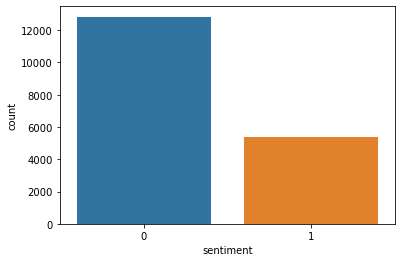

In [3]:
sns.countplot(data=df, x="sentiment")

In [17]:
df["sentence"].describe()

count                                                 18197
unique                                                 4529
top       #BreakingNews: Aneh, Mengapa Menkumham Standar...
freq                                                     56
Name: sentence, dtype: object

In [30]:
def calculate_total_puncs():
    punc_keys : Dict = {};[punc_keys.update({punc : 0}) for punc in string.punctuation];
    for text in df["sentence"]:
        for word in text:
            if word in punc_keys:
                punc_keys[word] += 1
    return punc_keys
punc_keys = calculate_total_puncs()

Text(0.5, 0, 'Punctuation')

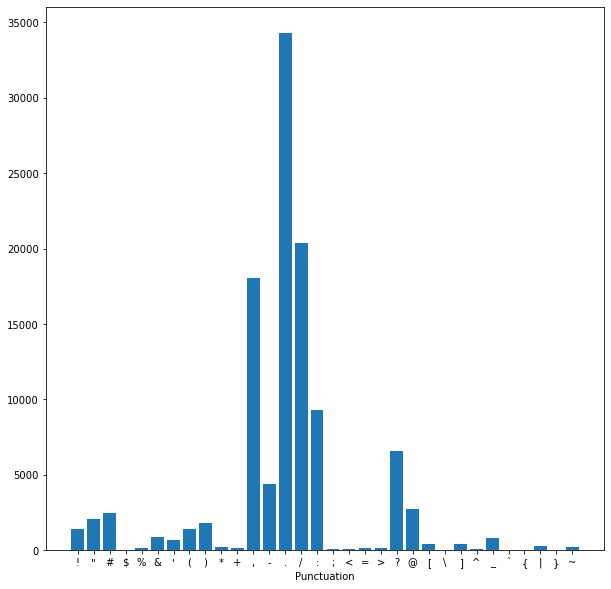

In [36]:
plt.figure(figsize=(10,10))
plt.bar(x=punc_keys.keys(), height=punc_keys.values())
plt.xlabel("Punctuation")


Kayaknya kebanyakan Link disini, Tanda kurung juga samir, banyak, tapi belom tau di extract dlu atau jangan kontennya

In [43]:
def calculate_total_length(text : str) -> int:
    return len(text.split())

def calculate_total_stopwords(text : str) -> int:
    total : int = 0
    for i in text.split():
        if i in stopwords:
            total += 1
    return total

def calculate_total_unique_words(text : str) -> int:
    return len(set(text.split()))

def calculate_avg_word_length(text:str) -> float:
    return np.mean([len(word) for word in text.split()])


df["total_length"] = df["sentence"].apply(lambda x :  calculate_total_length(x))
df["total_stopwords"] = df["sentence"].apply(lambda x :  calculate_total_stopwords(x))
df["total_unique"] = df["sentence"].apply(lambda x : calculate_total_unique_words(x))
df["avg_word_length"] =df["sentence"].apply(lambda x : calculate_avg_word_length(x))


<BarContainer object of 77 artists>

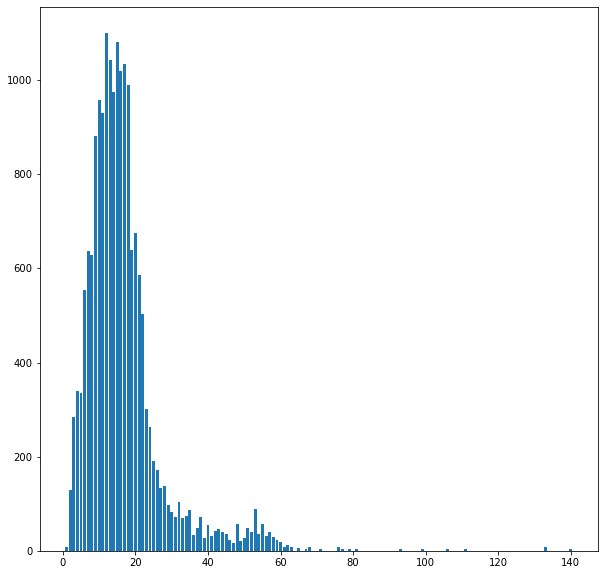

In [46]:
plt.figure(figsize=(10,10))
plt.bar(df["total_length"].value_counts().index,df["total_length"].value_counts().values)

<BarContainer object of 38 artists>

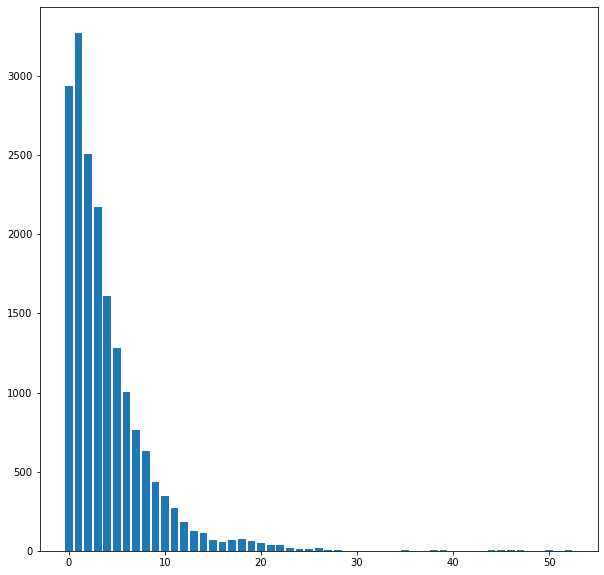

In [47]:
plt.figure(figsize=(10,10))
plt.bar(df["total_stopwords"].value_counts().index,df["total_stopwords"].value_counts().values)

<BarContainer object of 67 artists>

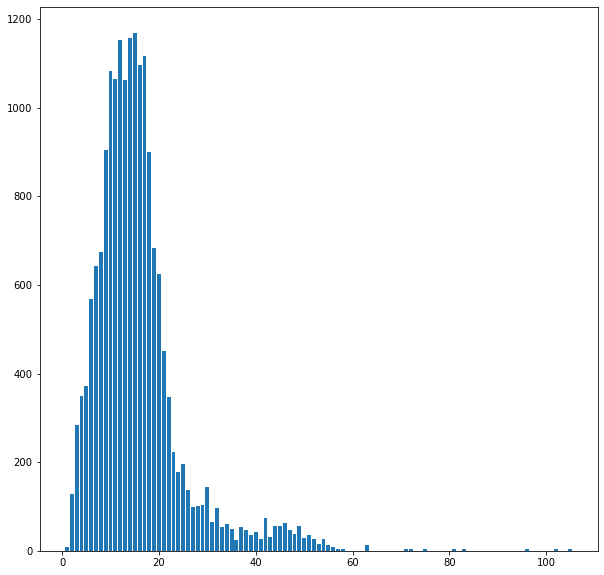

In [48]:
plt.figure(figsize=(10,10))
plt.bar(df["total_unique"].value_counts().index,df["total_unique"].value_counts().values)

<BarContainer object of 1056 artists>

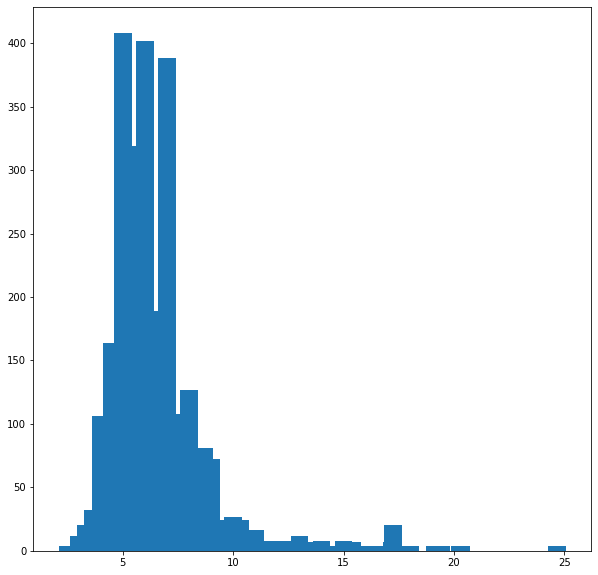

In [49]:
plt.figure(figsize=(10,10))
plt.bar(df["avg_word_length"].value_counts().index,df["avg_word_length"].value_counts().values)

In [70]:
## Visualize Numbers, penting atau tidak
def count_the_numbers() -> Dict:
    numbers : Dict = {}
    for text in df["sentence"]:
        for char in text.split():
            try:
                if(len((char)) < 3):
                    if int(char) not in numbers:
                        numbers[int(char)] = 1
                    else:
                        numbers[int(char)] += 1
            except ValueError:
                continue
    return numbers
numbers_on_dataset = count_the_numbers()
numbers_on_dataset

{7: 59,
 2: 460,
 1: 371,
 3: 246,
 40: 8,
 8: 31,
 12: 46,
 30: 59,
 61: 4,
 5: 118,
 15: 28,
 25: 12,
 50: 16,
 4: 92,
 32: 4,
 31: 4,
 10: 60,
 38: 4,
 19: 20,
 28: 16,
 24: 20,
 20: 35,
 16: 24,
 6: 44,
 35: 4,
 9: 28,
 18: 28,
 11: 8,
 22: 8,
 90: 4,
 60: 4,
 77: 4,
 45: 8,
 21: 12,
 17: 8,
 14: 4,
 68: 4,
 0: 3,
 43: 3}

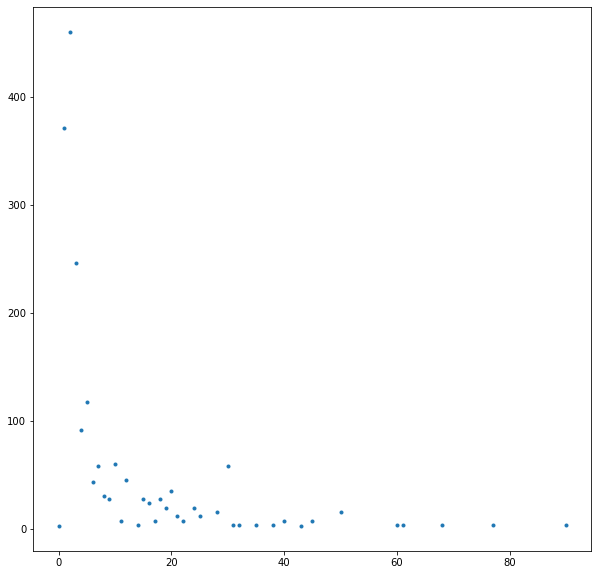

In [71]:
plt.figure(figsize=(10,10))
plt.plot(numbers_on_dataset.keys(), numbers_on_dataset.values(),".")

Ini Kayaknya ga harus dihapus dah nomor, 

TabError: inconsistent use of tabs and spaces in indentation (<ipython-input-77-23117405e46d>, line 4)

In [87]:
def count_total_stopwords():
	stopwords_dict = {}
	for text in df["sentence"]:
		for word in text.split():
			if word in stopwords:
				if word not in stopwords_dict:
					stopwords_dict[word] = 1
				else:
					stopwords_dict[word] += 1
	return stopwords_dict
stopwords_dict = count_total_stopwords()
stopwords_dict

{'satu': 302,
 'apa': 288,
 'aku': 633,
 'selalu': 213,
 'itu': 735,
 'dari': 984,
 'pernah': 291,
 'ini': 754,
 'masa': 133,
 'amatlah': 4,
 'merasa': 54,
 'cuma': 568,
 'mau': 366,
 'dia': 454,
 'bisa': 1340,
 'dan': 4681,
 'kita': 376,
 'bukan': 222,
 'baik': 540,
 'mereka': 116,
 'di': 5009,
 'tidak': 4378,
 'tapi': 1247,
 'tiba': 22,
 'lebih': 596,
 'dengan': 1104,
 'hanya': 789,
 'oleh': 177,
 'lewat': 71,
 'paling': 209,
 'beberapa': 119,
 'sudah': 547,
 'terlihat': 102,
 'agak': 710,
 'ada': 3484,
 'sangat': 882,
 'bagi': 72,
 'buat': 522,
 'yang': 2243,
 'dapat': 429,
 'sebuah': 35,
 'memberi': 43,
 'untuk': 1398,
 'guna': 12,
 'tempat': 589,
 'pihak': 66,
 'segera': 39,
 'belum': 200,
 'kata': 67,
 'sebagai': 70,
 'tersebut': 23,
 'sebenarnya': 40,
 'telah': 63,
 'lama': 220,
 'datang': 201,
 'adalah': 260,
 'jangan': 159,
 'mana': 125,
 'dulu': 115,
 'siapa': 24,
 'sedang': 119,
 'saat': 474,
 'tepat': 23,
 'hal': 91,
 'kecil': 254,
 'mengucapkan': 16,
 'tahun': 96,
 'baru':